In [130]:
import os
import cv2
import numpy as np

In [189]:
def get_roi(doc, stamp):
    h, w, _ = doc.shape

    starting_h = h - stamp.shape[0]
    ending_h = h

    middle_w  = w // 2
    starting_w = middle_w - stamp.shape[1]//2
    ending_w = starting_w + stamp.shape[1]

    roi = doc[starting_h: ending_h, starting_w:ending_w, :]
    return roi, starting_h, ending_h, starting_w, ending_w


def bgremove(image):
    """
    Background Removal
    """
    myimage_grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, baseline = cv2.threshold(myimage_grey,127,255,cv2.THRESH_TRUNC)
    _, background = cv2.threshold(baseline,127,255,cv2.THRESH_BINARY)
    _, foreground = cv2.threshold(baseline,127,255,cv2.THRESH_BINARY_INV)

    foreground = cv2.bitwise_and(image,image, mask=foreground)
    background = cv2.cvtColor(background, cv2.COLOR_GRAY2BGR)

    finalimage = background+foreground
    return finalimage

def add_stamp(doc, stamp, imshow = False, imwrite = False):
    # gray = cv2.cvtColor(stamp, cv2.COLOR_BGR2GRAY)
    # _, mask = cv2.threshold(gray, 245, 255, cv2.THRESH_BINARY_INV)
    # stamp = cv2.bitwise_and(stamp, stamp, mask=mask)
    # mask_inv = cv2.bitwise_not(mask)
    # graydoc = cv2.cvtColor(doc, cv2.COLOR_BGR2GRAY)
    # mask_inv = cv2.bitwise_not(mask)
    # anded = cv2.bitwise_and(roi, roi, mask=mask_inv)
    # stamp = cv2.bitwise_or(stamp, stamp, mask=mask)
    # dst = cv2.add(anded, stamp)
    dst = bgremove(stamp)
    # cv2.imshow("STMAP", dst)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    roi, starting_h, ending_h, starting_w, ending_w = get_roi(doc, stamp)
    doc[starting_h: ending_h, starting_w:ending_w, :] = dst

    if imshow:
        show_doc = doc.copy()
        show_doc = cv2.resize(show_doc, None, fx=0.75, fy=0.75)
        cv2.imshow("DOC", show_doc)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

    if imwrite:
        pass

    return doc

In [171]:
stamp = cv2.imread("assets/stamp3.png")
stamp = cv2.resize(stamp, (250,250))

doc = cv2.imread("assets/doc1.png")
doc = cv2.cvtColor(doc, cv2.COLOR_BGR2RGB)
add_stamp(doc, stamp, True, False)

In [ ]:
import cv2
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
 
def showimage(myimage):
    if (myimage.ndim>2):  #This only applies to RGB or RGBA images (e.g. not to Black and White images)
        myimage = myimage[:,:,::-1] #OpenCV follows BGR order, while matplotlib likely follows RGB order
         
    fig, ax = plt.subplots(figsize=[10,10])
    ax.imshow(myimage, cmap = 'gray', interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

In [201]:
# import module
from pdf2image import convert_from_path
from IPython.display import display, Image
from PIL import Image

images = convert_from_path('assets/doc.pdf', poppler_path=r"C:\Users\alzop\Downloads\Release-24.02.0-0\poppler-24.02.0\Library\bin")
stamp = cv2.imread("assets/stamp3.png")
stamp = cv2.resize(stamp, (250,250))

stamped_imgs = []
for idx, img in enumerate(images):
    img = np.array(img)
    stamped_img = add_stamp(img, stamp, False, False)
    stamped_img = Image.fromarray(stamped_img.astype('uint8'), 'RGB')
    stamped_imgs.append(stamped_img)
    
# len(stamped_imgs)
stamped_imgs[0].save(
    "test2.pdf", "PDF", resolution=100.0, save_all=True, append_images=stamped_imgs[1:]
)

In [ ]:
# TO BE CONTINUED:
# 1. Check the Stamp & Doc Colors "RGB"
# 2. WHITE SPACE SEARCHING
# 3. Stamp BackGround --> Temp UI Integration##
# 4. Build the App Using Streamlit
# 5. Code Optimization
# 6. Push Inot Streamlit Cloud
# 7. Push Into GitHub
# 8. Docker
# 8. Share the Project.

In [198]:
from PIL import Image  # install by > python3 -m pip install --upgrade Pillow  # ref. https://pillow.readthedocs.io/en/latest/installation.html#basic-installation

from PIL import Image
import numpy as np

img = cv2.imread("assets/stamped_img_1.jpg")
img = Image.fromarray(img.astype('uint8'), 'RGB')
# PIL_image = Image.fromarray(np.uint8(numpy_image)).convert('RGB')

images = [img]

pdf_path = "test.pdf"
    
images[0].save(
    pdf_path, "PDF" ,resolution=100.0, save_all=True, append_images=images[1:]
)

In [194]:
from fpdf import FPDF
import cv2
pdf = FPDF()
img = cv2.imread("assets/stamped_img_1.jpg")
imgs = [img]
# imagelist is the list with all image filenames
for image in imgs:
    # print(image)
    pdf.add_page()
    pdf.image(image)
pdf.output("yourfile.pdf", "F")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [164]:
stamp1 = cv2.imread('assets/stamp3.png')

Original Image:


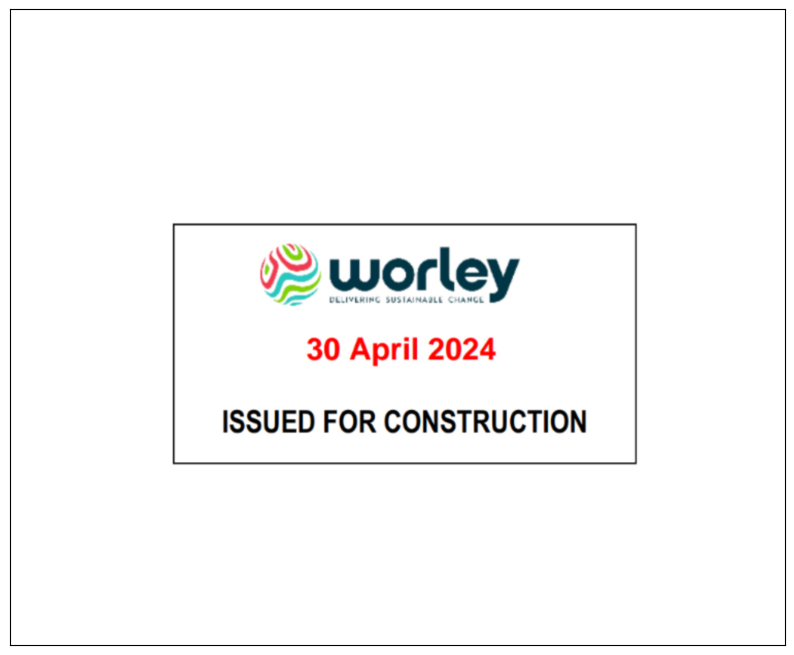

Processed Image:


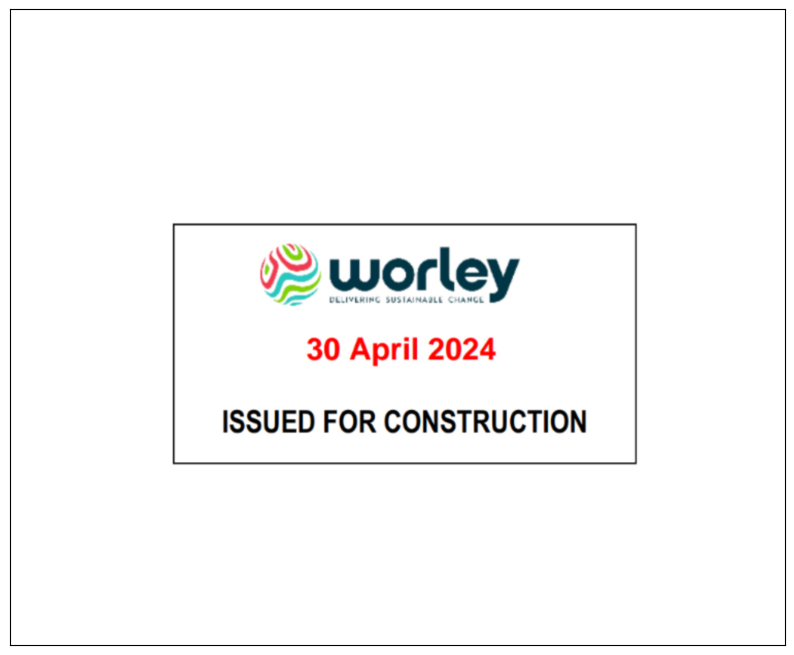

In [166]:
print("Original Image:")
showimage(stamp1)

print("Processed Image:")
showimage(processed_image)

In [1]:
pip install rembg

  Using cached rembg-2.0.57-py3-none-any.whl.metadata (16 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached onnxruntime-1.18.1-cp310-cp310-win_amd64.whl.metadata (4.5 kB)
  Using cached opencv_python_headless-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached pooch-1.8.2-py3-none-any.whl.metadata (10 kB)
  Using cached PyMatting-1.1.12-py3-none-any.whl.metadata (7.4 kB)
  Using cached scikit_image-0.24.0-cp310-cp310-win_amd64.whl.metadata (14 kB)
  Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached coloredlogs-15.0.1-py2.py3-none-any.whl.metadata (12 kB)
  Using cached numba-0.60.0-cp310-cp310-win_amd64.whl.metadata (2.8 kB)
  Using cached imageio-2.34.2-py3-none-any.whl.metadata (4.9 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
  Using cached llvmlite-0.43.0-cp310-cp310-win_amd64.whl.metadata (4.9 kB)
  Using cached humanfriendly-10.0-py2.py3-none-any.whl.metada


[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
 pip install --upgrade pip

  Using cached pip-24.1.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.1.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.3.2
    Uninstalling pip-23.3.2:
      Successfully uninstalled pip-23.3.2
Note: you may need to restart the kernel to use updated packages.


In [ ]:
imprt as ps